In [1]:
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
%matplotlib notebook
import math as ma
from scipy.interpolate import interp1d
from scipy.stats.stats import pearsonr
from scipy.optimize import leastsq
from matplotlib.ticker import ScalarFormatter
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
%matplotlib inline
from sklearn.ensemble import IsolationForest
import plotly.express as px
import shap
from sklearn.ensemble import IsolationForest

In [9]:
df2= pd.read_csv('combined1.csv')

In [10]:
df2.columns

Index(['Unnamed: 0', 'np_type', 'mrp', 'current_47mm_nA', 'rms_noise_47mm_pA',
       'voltage_47mm_V', 'particle_rate_47mm_/min', 'dI_47mm_nA',
       'g_at_47mm_nS', 'mrp_47mm_nm', 'dI/I_47mm', 'width_85_std',
       'width_85_median', 'width_85_skewness', 'width_85_kurtosis',
       'asymmetry_85_std', 'asymmetry_85_median', 'asymmetry_85_skewness',
       'asymmetry_85_kurtosis', 'width_50_std', 'width_50_median',
       'width_50_skewness', 'width_50_kurtosis', 'asymmetry_50_std',
       'asymmetry_50_median', 'asymmetry_50_skewness', 'asymmetry_50_kurtosis',
       'prominence_std', 'prominence_median', 'prominence_skewness',
       'prominence_kurtosis'],
      dtype='object')

In [11]:
df2 = df2.drop(['Unnamed: 0', 'np_type', 'rms_noise_47mm_pA', 'mrp_47mm_nm', 'width_85_kurtosis', 'asymmetry_85_kurtosis', 'width_50_kurtosis', 'asymmetry_50_kurtosis', 'prominence_kurtosis'], axis=1)

In [12]:
from sklearn.preprocessing import PowerTransformer
from pandas import DataFrame
df3=PowerTransformer(method='yeo-johnson').fit_transform(df2)
df3=DataFrame(df2)

divide by zero encountered in log


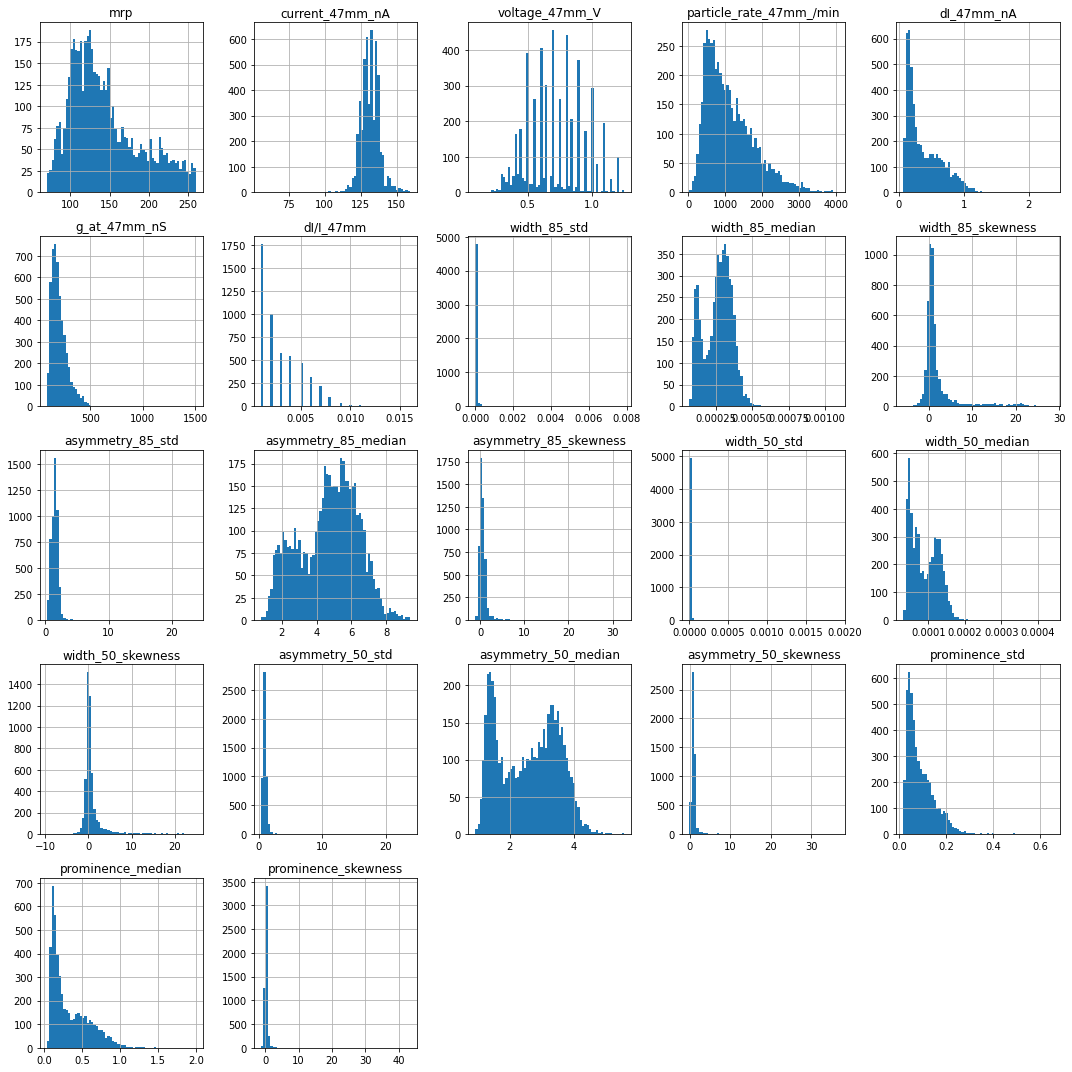

In [14]:
df3.hist(figsize=(15,15), bins = 64)
plt.tight_layout()

In [15]:
iforest = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.1, max_features=5, 
                          bootstrap=False, n_jobs=-1, random_state=2022)

In [16]:
pred= iforest.fit_predict(df3)
df3['scores']=iforest.decision_function(df3)
df3['anomaly_label']=pred

In [17]:
X=df3.drop(['scores', 'anomaly_label'], axis=1)

In [18]:
explainer = shap.Explainer(iforest.predict, X)
shap_values = explainer(X)

Permutation explainer: 5054it [4:01:08,  2.86s/it]                                                                     


In [19]:
shap.initjs()

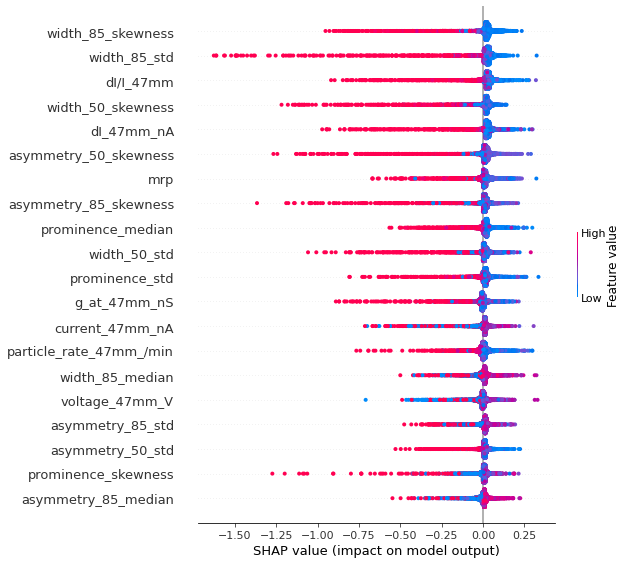

In [20]:
shap.summary_plot(shap_values, X, show=False)
plt.savefig('Combined_IF_Norm_skew.png', dpi=300, bbox_inches='tight')

In [21]:
from pyod.models.knn import KNN
from pyod.models.pca import PCA

In [22]:
df3= df2[['mrp', 'current_47mm_nA', 'voltage_47mm_V', 'particle_rate_47mm_/min',
       'dI_47mm_nA', 'width_85_std',
       'width_85_median', 'width_85_skewness', 'asymmetry_85_std',
       'asymmetry_85_median', 'asymmetry_85_skewness', 'width_50_std',
       'width_50_median', 'width_50_skewness', 'asymmetry_50_std',
       'asymmetry_50_median', 'asymmetry_50_skewness', 'prominence_std',
       'prominence_median', 'prominence_skewness']]

In [23]:
clf = KNN(contamination=0.05)
#clf = PCA(contamination=0.05)
clf.fit(df3)

KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [24]:
X=df3
clf.fit(X)
scores_pred = clf.decision_function(X)
y_pred = clf.predict(X)
y_pred1 = y_pred * -1
df3[y_pred1 == -1]

,mrp,current_47mm_nA,voltage_47mm_V,particle_rate_47mm_/min,dI_47mm_nA,width_85_std,width_85_median,width_85_skewness,asymmetry_85_std,asymmetry_85_median,asymmetry_85_skewness,width_50_std,width_50_median,width_50_skewness,asymmetry_50_std,asymmetry_50_median,asymmetry_50_skewness,prominence_std,prominence_median,prominence_skewness
0,70.0,108.0,1.20,485.9,0.505,0.000072,0.000221,2.492282,1.608065,4.127279,0.236844,0.000011,0.000048,1.343975,0.857483,1.627421,1.188665,0.105582,0.424877,0.075484
9,87.0,119.0,0.90,1104.4,0.248,0.000352,0.000292,20.512467,1.078819,3.345941,1.208921,0.000246,0.000080,21.610799,0.760314,2.139056,1.196754,0.064443,0.207485,0.870517
15,78.0,126.0,1.00,1989.5,0.364,0.000641,0.000171,13.637871,1.169322,2.321818,1.049680,0.000015,0.000041,15.980253,0.846398,1.329097,3.082189,0.154573,0.284737,7.309524
21,70.0,116.0,0.80,1749.1,0.546,0.000034,0.000149,0.599081,0.962719,3.235971,0.326419,0.000007,0.000038,10.069442,0.730260,1.226321,0.422802,0.280369,0.409369,11.440805
26,79.0,134.0,1.10,146.8,0.372,0.000141,0.000193,11.094499,1.343732,3.852941,0.933468,0.000010,0.000045,0.915360,0.865526,1.565011,0.764658,0.088038,0.289261,0.418144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,239.0,126.0,0.50,2185.0,0.114,0.000107,0.000340,0.475223,2.509314,6.269499,0.557843,0.000033,0.000117,0.350918,1.693180,3.916495,0.721551,0.219702,0.084820,25.919336
5043,203.0,123.0,0.45,345.7,0.886,0.000021,0.000317,-0.813053,2.089342,6.757378,0.099616,0.000008,0.000085,0.210369,1.214484,2.794518,1.215874,0.163566,0.773464,0.263127
5045,230.0,130.0,0.65,692.8,0.152,0.000221,0.000542,2.089855,0.675367,2.118958,1.388433,0.000075,0.000239,1.043135,0.706848,1.195167,3.033271,0.021500,0.142540,-0.964049
5048,258.0,127.0,0.30,2308.7,0.105,0.000057,0.000128,0.346187,1.444486,2.604072,1.027075,0.000019,0.000052,0.448900,1.193180,1.677880,1.730023,0.038379,0.076378,0.544424


In [25]:
explainer = shap.Explainer(clf.predict, X)
shap_values = explainer(X)

Permutation explainer: 5054it [5:40:40,  4.05s/it]                                                                     


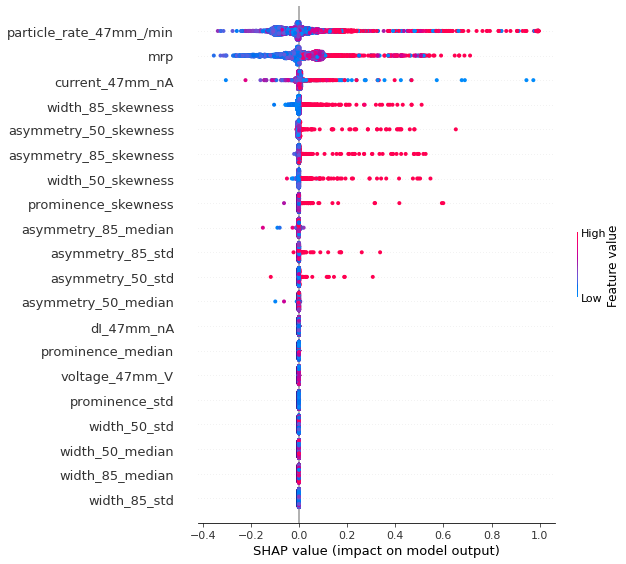

In [26]:
shap.summary_plot(shap_values, X, show=False)
plt.savefig('Combined_normalised_KNN_5%.png', dpi=300, bbox_inches='tight')

In [27]:
clf1 = PCA(contamination=0.05)

In [28]:
X1=df3
clf1.fit(X1)
scores_pred = clf1.decision_function(X1)
y_pred2 = clf1.predict(X1)
y_pred3 = y_pred2 * -1
scores_pred
df3[y_pred3 == -1]

,mrp,current_47mm_nA,voltage_47mm_V,particle_rate_47mm_/min,dI_47mm_nA,width_85_std,width_85_median,width_85_skewness,asymmetry_85_std,asymmetry_85_median,asymmetry_85_skewness,width_50_std,width_50_median,width_50_skewness,asymmetry_50_std,asymmetry_50_median,asymmetry_50_skewness,prominence_std,prominence_median,prominence_skewness
3,87.0,128.0,1.10,976.6,0.273,0.000263,0.000209,13.431426,1.060532,2.830532,0.708336,0.000086,0.000052,21.028952,0.830027,1.430602,1.417796,0.058941,0.219372,0.230569
7,85.0,113.0,0.90,1039.2,0.253,0.000084,0.000211,4.003809,1.070011,2.580443,1.191028,0.000021,0.000055,5.560933,0.778944,1.478727,1.336272,0.483996,0.195358,14.096084
9,87.0,119.0,0.90,1104.4,0.248,0.000352,0.000292,20.512467,1.078819,3.345941,1.208921,0.000246,0.000080,21.610799,0.760314,2.139056,1.196754,0.064443,0.207485,0.870517
15,78.0,126.0,1.00,1989.5,0.364,0.000641,0.000171,13.637871,1.169322,2.321818,1.049680,0.000015,0.000041,15.980253,0.846398,1.329097,3.082189,0.154573,0.284737,7.309524
21,70.0,116.0,0.80,1749.1,0.546,0.000034,0.000149,0.599081,0.962719,3.235971,0.326419,0.000007,0.000038,10.069442,0.730260,1.226321,0.422802,0.280369,0.409369,11.440805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,207.0,131.0,0.32,737.4,0.891,0.001529,0.000230,21.293771,1.769239,4.970432,-0.351057,0.000008,0.000061,0.405060,0.978988,1.847712,1.076213,0.214478,0.771137,0.059349
4982,253.0,127.0,0.45,327.6,0.475,0.000472,0.001091,6.487810,2.431750,4.980458,3.893691,0.000165,0.000439,4.300856,1.996753,4.020269,1.560014,0.098196,0.444119,1.138240
5037,239.0,126.0,0.50,2185.0,0.114,0.000107,0.000340,0.475223,2.509314,6.269499,0.557843,0.000033,0.000117,0.350918,1.693180,3.916495,0.721551,0.219702,0.084820,25.919336
5042,239.0,141.0,0.60,1585.0,0.127,0.000099,0.000377,0.077456,2.485626,7.037310,0.422231,0.000032,0.000119,1.121188,1.761703,3.916001,1.183580,0.058895,0.101948,12.533681


In [29]:
explainer = shap.Explainer(clf1.predict, X1)
shap_values = explainer(X1)

Permutation explainer: 5054it [06:01, 13.63it/s]                                                                       


In [30]:
shap.initjs()

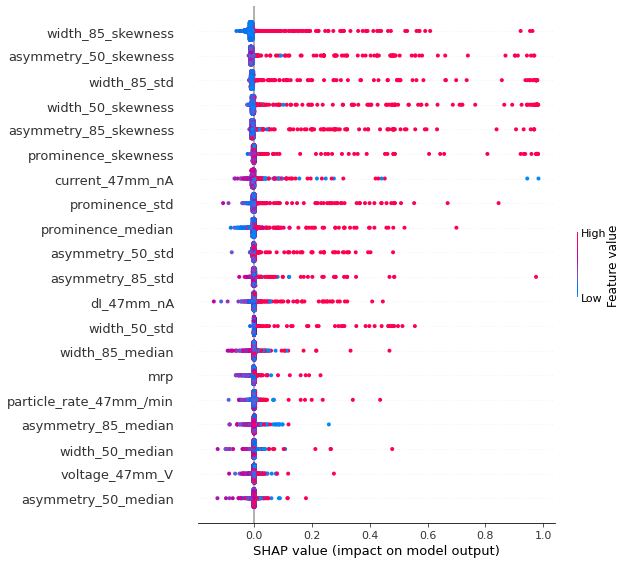

In [31]:
shap.summary_plot(shap_values, X1, show=False)
plt.savefig('Combined_normalised_PCA_5%.png', dpi=300, bbox_inches='tight')